# 3.Data Cleaning

# Handling missing values

## Challenge 3.1) Checking for missing values

received the raw data file and need to clean up before proceeding.

+ Indentify the columns with missing values
+ Determine total number of missing values
+ Treat the missing values (drop row, fill with values)

In [110]:
import pandas as pd

In [111]:
df = pd.read_csv('data/landslides.csv')

In [112]:
df.head(2)

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [114]:
df.isnull().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [115]:
df.isna().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

---------

### Date Column
+ drop rows

In [116]:
# First Approach
# ~(tilde) means Opposite, so meaning NOT NULL VALUES

df[~df['date'].isnull()]

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [117]:
df = df[~df['date'].isnull()]

In [ ]:
# Second Approach
df = df.dropna('date', axis=1)

In [119]:
df.isnull().sum()

id                   0
date                 0
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

--------

### Time Column
+ fill with specific time

In [120]:
df['time'].value_counts()

Night            97
Morning          87
Afternoon        58
Early morning    36
3:00:00          12
                 ..
1:13              1
9:40:00           1
11:50:00          1
                  1
21:06             1
Name: time, Length: 159, dtype: int64

In [121]:
df['time'] = df['time'].fillna('Unknown')

In [122]:
df.head(2)

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,Unknown,United States,Ohio,17288,Landslide,Rain,NaN


In [123]:
df.isnull().sum()

id                  0
date                0
time                0
country_name        0
state/province      1
population          0
landslide_type      1
trigger             2
fatalities        247
dtype: int64

---------

### Fatalities Column
+ fill with mean value

In [124]:
mean = df['fatalities'].mean()

df['fatalities'] = df['fatalities'].fillna(mean)

In [125]:
df.head(2)

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,3/22/07,Unknown,United States,Ohio,17288,Landslide,Rain,1.462231


In [126]:
df.isnull().sum()

id                0
date              0
time              0
country_name      0
state/province    1
population        0
landslide_type    1
trigger           2
fatalities        0
dtype: int64

-----
-----

# Challenge 3.2) Correct Datatype of the column

What is the most land-slide prone month in province/state?

In [127]:
df.head(2)

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,3/22/07,Unknown,United States,Ohio,17288,Landslide,Rain,1.462231


In [128]:
# convert date to datetime object
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

In [129]:
df.head(2)

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,2007-03-02,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,2007-03-22,Unknown,United States,Ohio,17288,Landslide,Rain,1.462231


In [130]:
# grab only Month value and create as a new column

In [131]:
df['month'] = df['date'].dt.month

df.head(2)

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities,month
0,34,2007-03-02,Night,United States,Virginia,16000,Landslide,Rain,1.462231,3
1,42,2007-03-22,Unknown,United States,Ohio,17288,Landslide,Rain,1.462231,3


In [62]:
# Visualize the distribution acorss the months

import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
month_order = sorted(df['month'].unique())
month_order

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

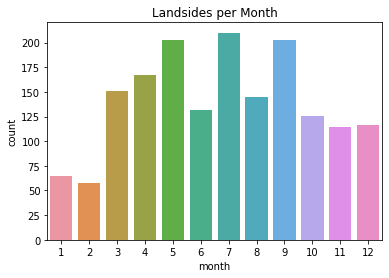

In [137]:
sns.countplot(x='month', data=df, order=month_order);
plt.title('Landsides per Month');

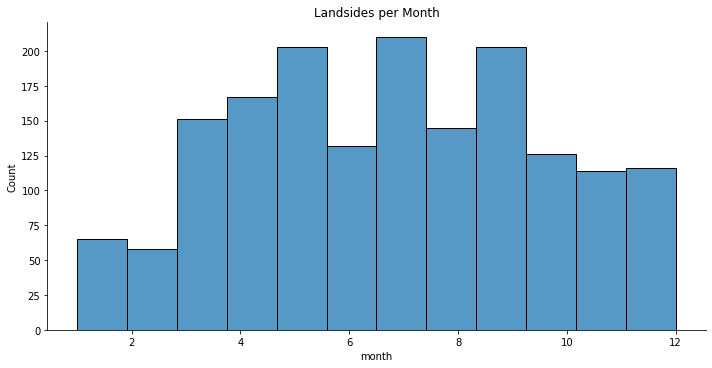

In [136]:
sns.displot(x='month', data=df, aspect=2, bins=12);
plt.title('Landsides per Month');

It seems like Month 7 (July) has the most landslides.

---------

## Challenge 3.3) Parse Dates in Time Series Data

it's hard to know and analyze Time data because of data inconsitency.

Make it into 5 categories - Morning, Afternoon, Evening and Night, Unknown.

In [138]:
df.head(1)

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities,month
0,34,2007-03-02,Night,United States,Virginia,16000,Landslide,Rain,1.462231,3


In [175]:
df['time'].value_counts()

Unknown           1065
Morning            226
Night              161
Afternoon          130
Early morning       36
Evening             10
evening              8
18:00:00             8
Late night           7
Overnight            6
12:00:00             5
12:00                3
18:44                2
18:30:00             2
18:00                2
12:15                2
Late afternoon       2
overnight            2
12:30:00             2
Late morning         2
Before dawn          1
                     1
18:46:00             1
Late evening         1
****                 1
18:15:00             1
18:45                1
12:20                1
18:53:00             1
Name: time, dtype: int64

In [195]:
# Custom Function to parse time data into specific categories
import datetime

def time_to_categories(x):
    
    if ":" in x.lower():
        if int(x.split(':')[0]) >= 12 and int(x.split(':')[0]) < 18:
            x = 'Afternoon'
        elif int(x.split(':')[0]) < 12:
            x = 'Morning'
        elif int(x.split(':')[0]) >= 18:
            x = 'Night'
    elif  'morning' in x.lower() or 'dawn' in x.lower():
        x = 'Morning'
    elif 'afternoon' in x.lower():
        x = 'Afternoon'
    elif 'evening' in x.lower():
        x = 'Evening'
    elif 'night' in x.lower():
        x = 'Night'
    else:
         x = 'Unknown'
    return x

In [196]:
df['time'] = df['time'].apply(time_to_categories)

In [197]:
df['time'].value_counts()

Unknown      1067
Morning       265
Night         194
Afternoon     145
Evening        19
Name: time, dtype: int64

-----------
